In [ ]:
import pandas as pd
from ctgan import CTGAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna
import warnings 
warnings.filterwarnings("ignore")

# Data path
name="C:\\Users\\User\\Desktop\\FYPML\\"
original_data=pd.read_csv(name+"model\\KOOS_training_update.csv",encoding="932",header=0)
filtered_data=pd.read_csv(name+"model\\n=3500.csv",encoding="932",header=0)

# categorical_columns
categorical_columns = ['sex','P1', 'P2', 'P3', 'P4', 'f1', 'f2', 'f3', 'f4', 'q1', 'q2', 'q3', 'q4']

original_data['source'] = 0  
filtered_data['source'] = 1  


combined_data = pd.concat([original_data, filtered_data], ignore_index=True)


combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_columns)


X = combined_data_encoded.drop('source', axis=1)
y = combined_data_encoded['source']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training by using RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

#Check the accuracy with test score 
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy（original vs combined）: {accuracy:.4f}")
if accuracy > 0.7:
    print("Note: If the discrimination accuracy is high (>70%), the composite data can be easily distinguished from the original data.")
else:
    print("Synthetic data may be statistically similar to the original data.")




判別精度（元データ vs 合成データ）: 0.7558
注意: 判別精度が高い（70%以上）場合、合成データは元データと容易に区別可能です。


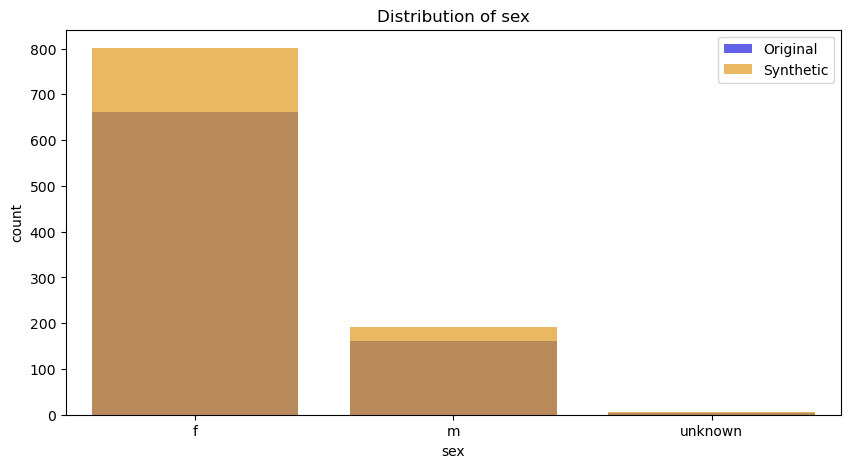

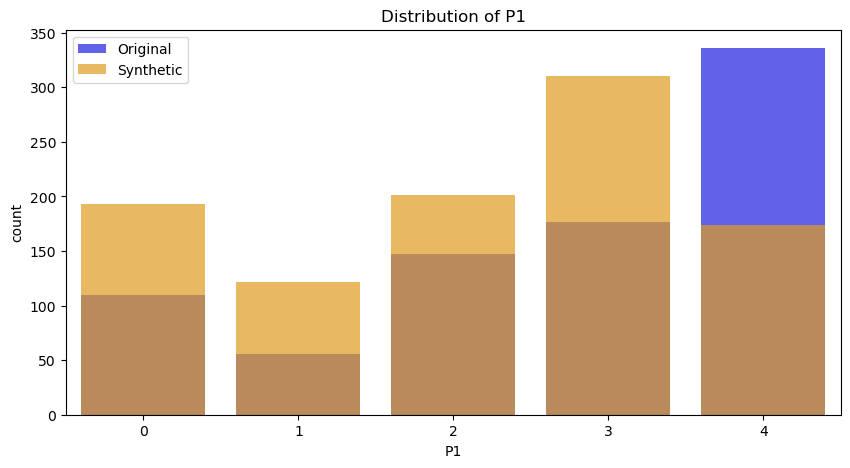

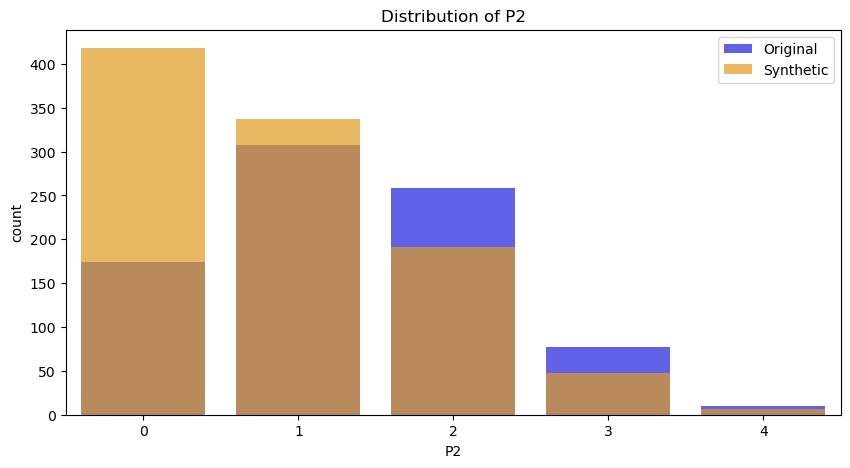

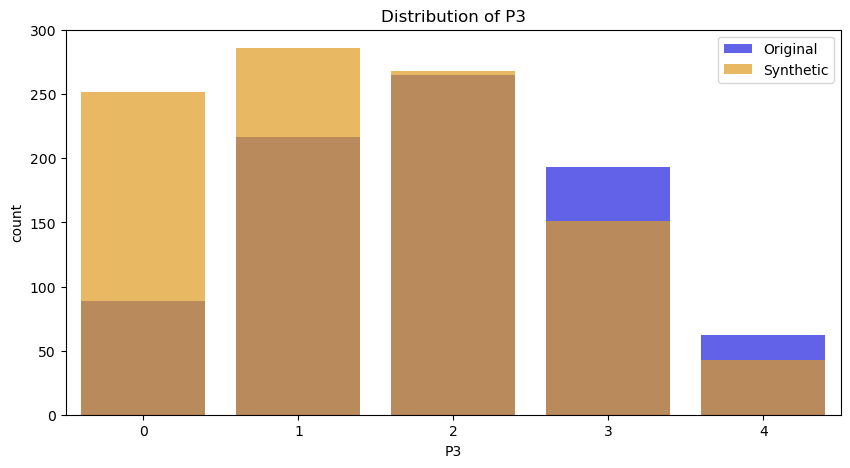

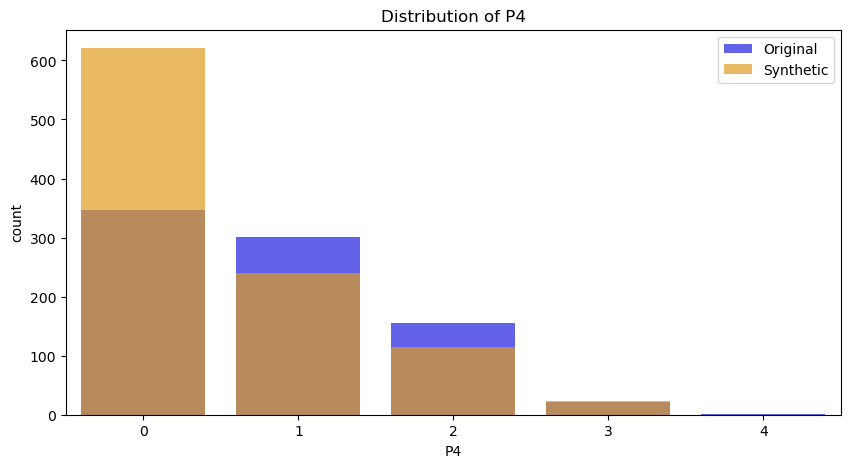

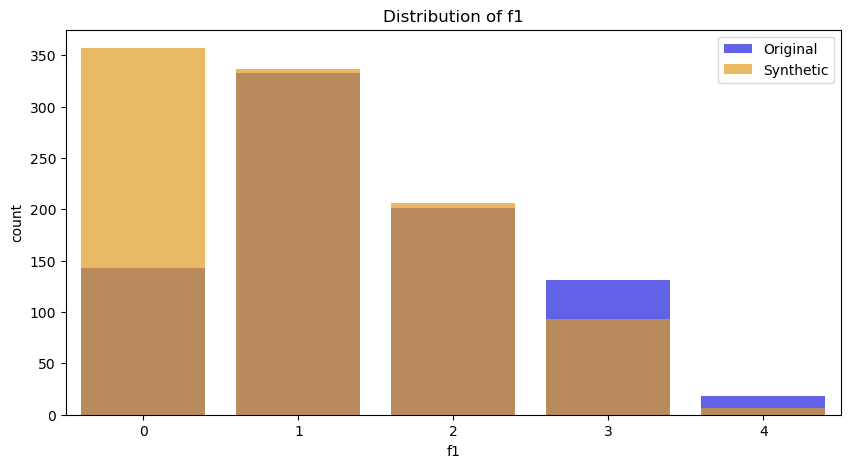

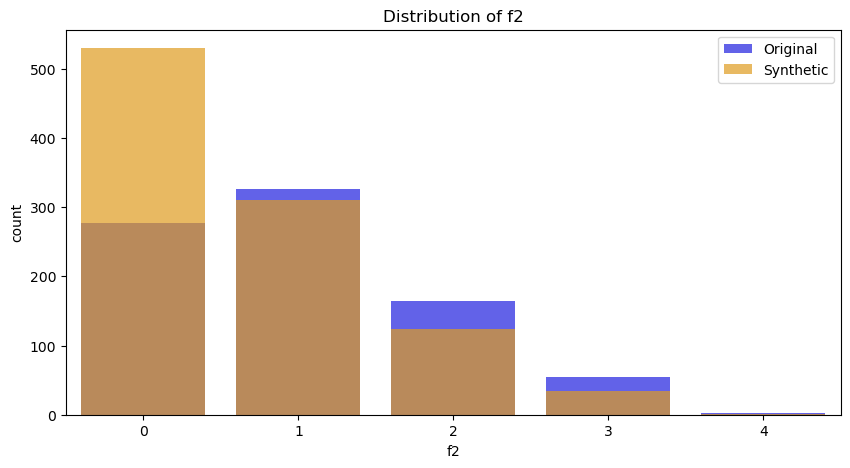

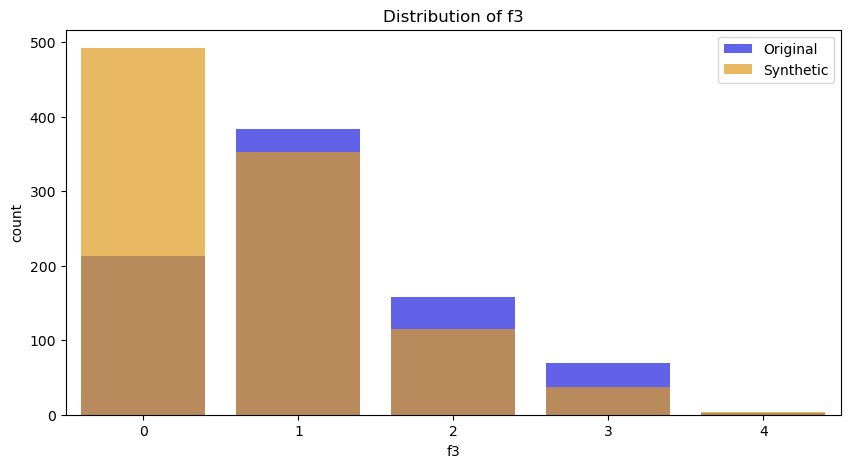

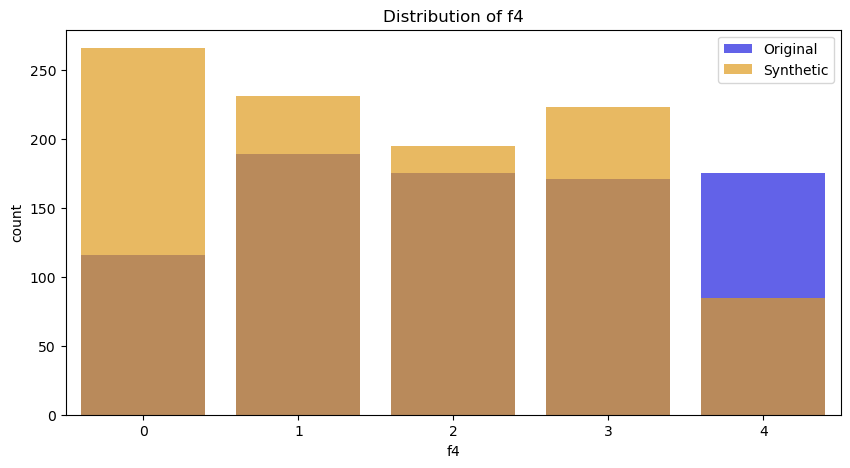

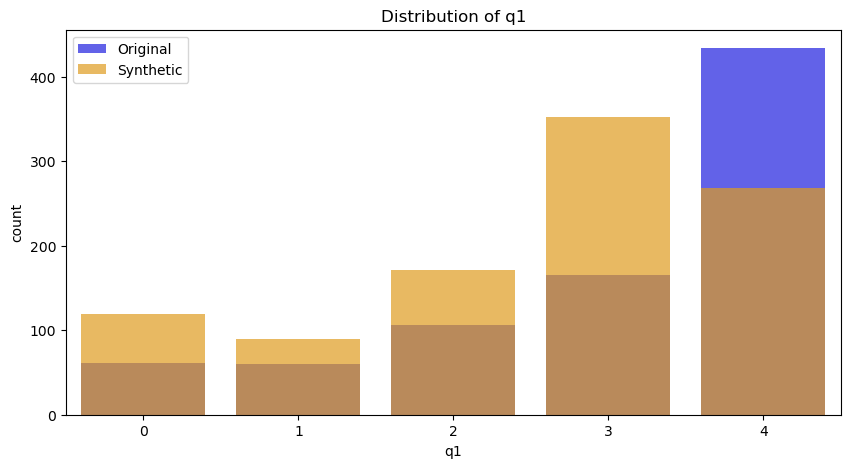

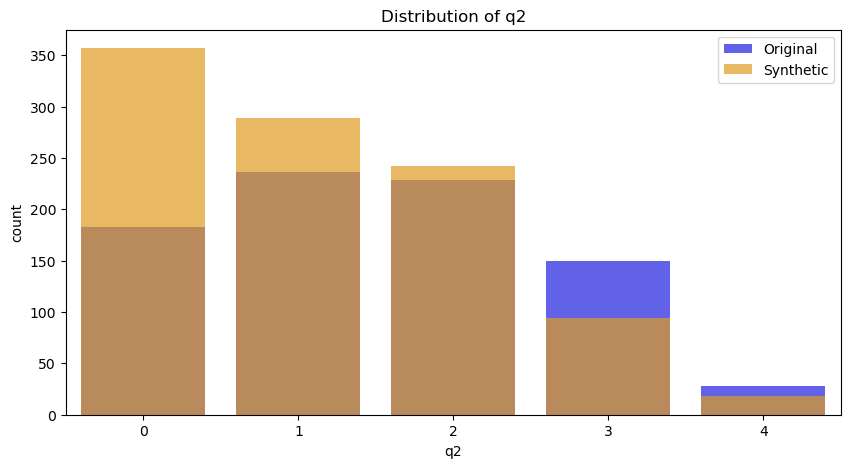

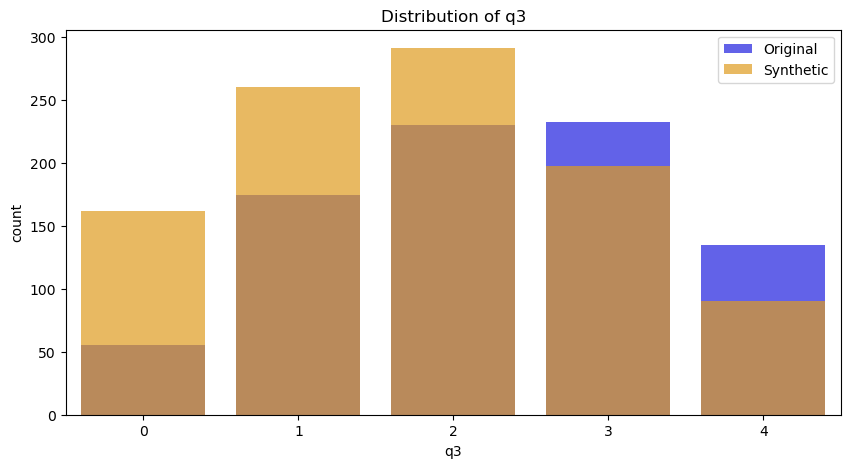

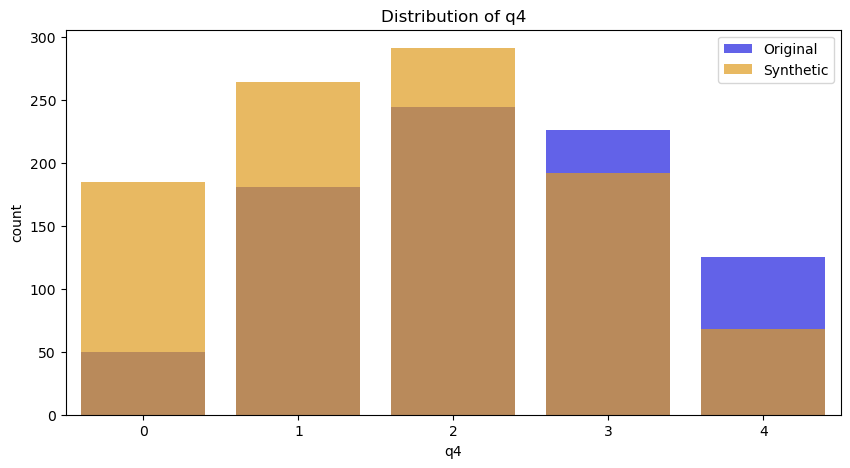

KeyError: 'period'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


# Visualisation

def plot_distributions(original, synthetic, columns, plot_type="categorical"):
    """
    Plot distributions for categorical or continuous variables.

    Args:
        original: DataFrame of the original data.
        synthetic: DataFrame of the synthetic data.
        columns: List of columns to visualize.
        plot_type: Type of distribution to plot ("categorical" or "continuous").
    """
    for column in columns:
        plt.figure(figsize=(10, 5))
        if plot_type == "categorical":
            sns.countplot(data=original, x=column, alpha=0.7, label="Original", color="blue")
            sns.countplot(data=synthetic, x=column, alpha=0.7, label="Synthetic", color="orange")
        elif plot_type == "continuous":
            sns.kdeplot(original[column], label="Original", shade=True, color="blue")
            sns.kdeplot(synthetic[column], label="Synthetic", shade=True, color="orange")

        plt.title(f"Distribution of {column}")
        plt.legend()
        plt.show()

# Visualise the distribution of the categorical columns
plot_distributions(original=original_data, synthetic=filtered_data, columns=categorical_columns, plot_type="categorical")

# Visualise the numerical columns
numerical_columns = ['period','Age','score','prp_count']
plot_distributions(original=original_data, synthetic=filtered_data, columns=numerical_columns, plot_type="continuous")